<a href="https://colab.research.google.com/github/nov05/Google-Colaboratory/blob/master/20250811_%E6%AF%94%E7%89%B9%E5%B8%81%E4%B8%8E%E6%A0%87%E6%99%AE500%E6%8C%87%E6%95%B0%E5%BD%92%E4%B8%80%E5%8C%96%E4%BB%B7%E6%A0%BC%E8%B5%B0%E5%8A%BF%E5%AF%B9%E6%AF%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!apt-get -qq install fonts-noto-cjk

Selecting previously unselected package fonts-noto-cjk.
(Reading database ... 126284 files and directories currently installed.)
Preparing to unpack .../fonts-noto-cjk_1%3a20220127+repack1-1_all.deb ...
Unpacking fonts-noto-cjk (1:20220127+repack1-1) ...
Setting up fonts-noto-cjk (1:20220127+repack1-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


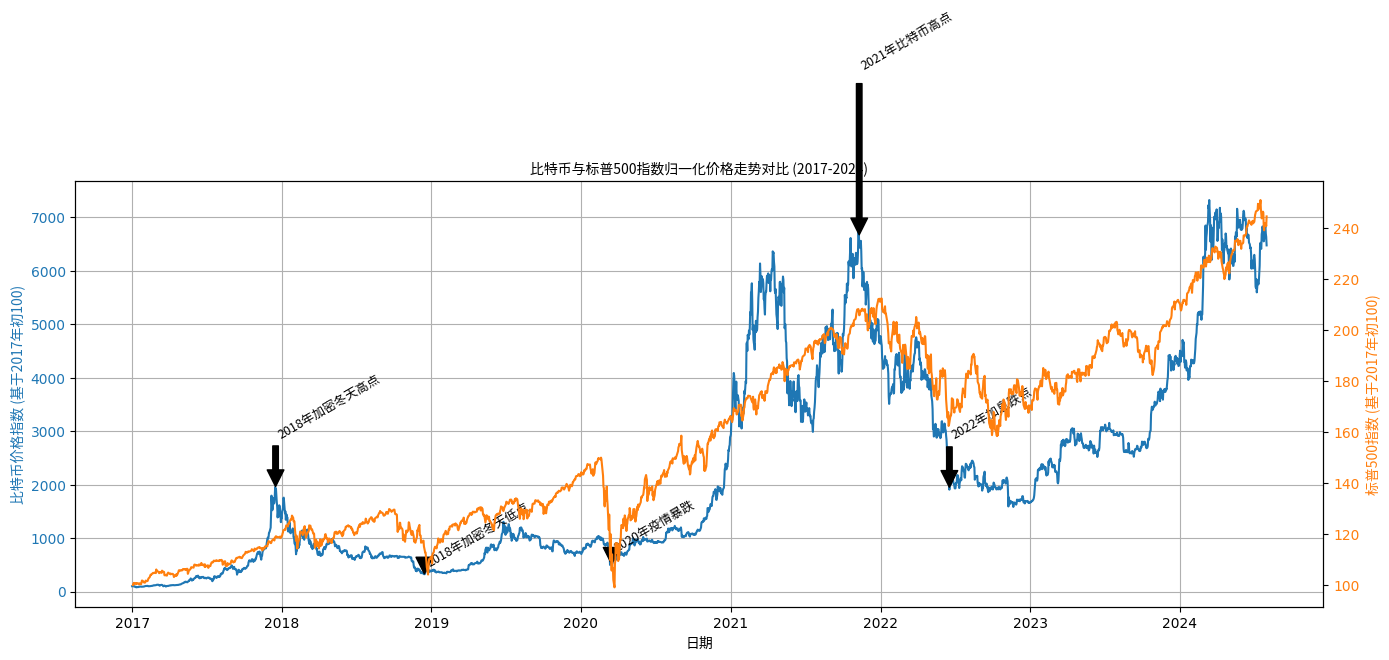

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import pandas as pd
import yfinance as yf

# 加载字体文件
font_path = '/usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc'
font_prop = fm.FontProperties(fname=font_path)

# 下载数据
btc = yf.download("BTC-USD", start="2017-01-01", end="2024-08-01", auto_adjust=True)
sp500 = yf.download("^GSPC", start="2017-01-01", end="2024-08-01", auto_adjust=True)

btc_close = btc['Close']
sp500_close = sp500['Close']

btc_norm = (btc_close / btc_close.iloc[0]) * 100
sp500_norm = (sp500_close / sp500_close.iloc[0]) * 100

fig, ax1 = plt.subplots(figsize=(14,7))

# 比特币曲线（左Y轴）
color_btc = 'tab:blue'
ax1.set_xlabel('日期', fontproperties=font_prop)
ax1.set_ylabel('比特币价格指数 (基于2017年初100)', color=color_btc, fontproperties=font_prop)
ax1.plot(btc_norm.index, btc_norm, color=color_btc, label='比特币价格指数')
ax1.tick_params(axis='y', labelcolor=color_btc)
ax1.grid(True)

# 标普500曲线（右Y轴）
ax2 = ax1.twinx()
color_sp500 = 'tab:orange'
ax2.set_ylabel('标普500指数 (基于2017年初100)', color=color_sp500, fontproperties=font_prop)
ax2.plot(sp500_norm.index, sp500_norm, color=color_sp500, label='标普500指数')
ax2.tick_params(axis='y', labelcolor=color_sp500)

# 事件注释，全部加在左侧Y轴上比特币曲线上
events = {
    '2018年加密冬天高点': '2017-12-17',
    '2018年加密冬天低点': '2018-12-15',
    '2020年疫情暴跌': '2020-03-16',
    '2021年比特币高点': '2021-11-10',
    '2022年加息跌点': '2022-06-18'
}

for label, date_str in events.items():
    date = pd.to_datetime(date_str)
    if date in btc_norm.index:
        ax1.annotate(label,
                     xy=(date, float(btc_norm.loc[date].iloc[0])),
                     xytext=(date, float(btc_norm.loc[date].iloc[0])*1.5),
                     arrowprops=dict(facecolor='black', shrink=0.05),
                     fontsize=9,
                     rotation=30,
                     fontproperties=font_prop)

plt.title('比特币与标普500指数归一化价格走势对比 (2017-2024)', fontproperties=font_prop)
fig.tight_layout()
plt.show()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


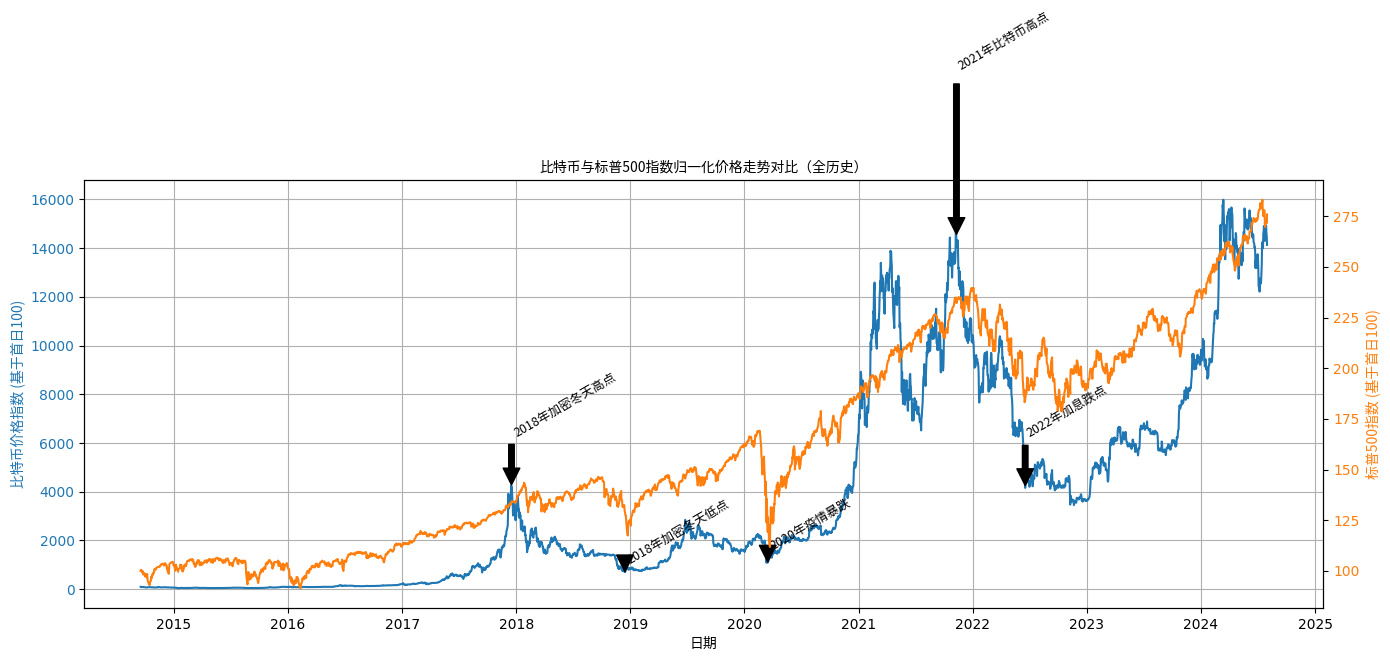

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import pandas as pd
import yfinance as yf

# 加载字体文件（Colab自带的Noto CJK）
font_path = '/usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc'
font_prop = fm.FontProperties(fname=font_path)

# 下载数据（使用比特币全历史）
btc = yf.download("BTC-USD", start="2010-07-01", end="2024-08-01", auto_adjust=True)
sp500 = yf.download("^GSPC", start=btc.index.min().strftime("%Y-%m-%d"), end="2024-08-01", auto_adjust=True)

btc_close = btc['Close']
sp500_close = sp500['Close']

# 按基准日归一化
btc_norm = (btc_close / btc_close.iloc[0]) * 100
sp500_norm = (sp500_close / sp500_close.iloc[0]) * 100

fig, ax1 = plt.subplots(figsize=(14, 7))

# 比特币曲线（左Y轴）
color_btc = 'tab:blue'
ax1.set_xlabel('日期', fontproperties=font_prop)
ax1.set_ylabel('比特币价格指数 (基于首日100)', color=color_btc, fontproperties=font_prop)
ax1.plot(btc_norm.index, btc_norm, color=color_btc, label='比特币价格指数')
ax1.tick_params(axis='y', labelcolor=color_btc)
ax1.grid(True)

# 标普500曲线（右Y轴）
ax2 = ax1.twinx()
color_sp500 = 'tab:orange'
ax2.set_ylabel('标普500指数 (基于首日100)', color=color_sp500, fontproperties=font_prop)
ax2.plot(sp500_norm.index, sp500_norm, color=color_sp500, label='标普500指数')
ax2.tick_params(axis='y', labelcolor=color_sp500)

# 事件注释（示例）
events = {
    '2013年牛市高点': '2013-12-04',
    '2018年加密冬天高点': '2017-12-17',
    '2018年加密冬天低点': '2018-12-15',
    '2020年疫情暴跌': '2020-03-16',
    '2021年比特币高点': '2021-11-10',
    '2022年加息跌点': '2022-06-18'
}

for label, date_str in events.items():
    date = pd.to_datetime(date_str)
    if date in btc_norm.index:
        y_val = float(btc_norm.loc[date].iloc[0] if hasattr(btc_norm.loc[date], 'iloc') else btc_norm.loc[date])
        ax1.annotate(label,
                     xy=(date, y_val),
                     xytext=(date, y_val * 1.5),
                     arrowprops=dict(facecolor='black', shrink=0.05),
                     fontsize=9,
                     rotation=30,
                     fontproperties=font_prop)

plt.title('比特币与标普500指数归一化价格走势对比（全历史）', fontproperties=font_prop)
fig.tight_layout()
plt.show()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


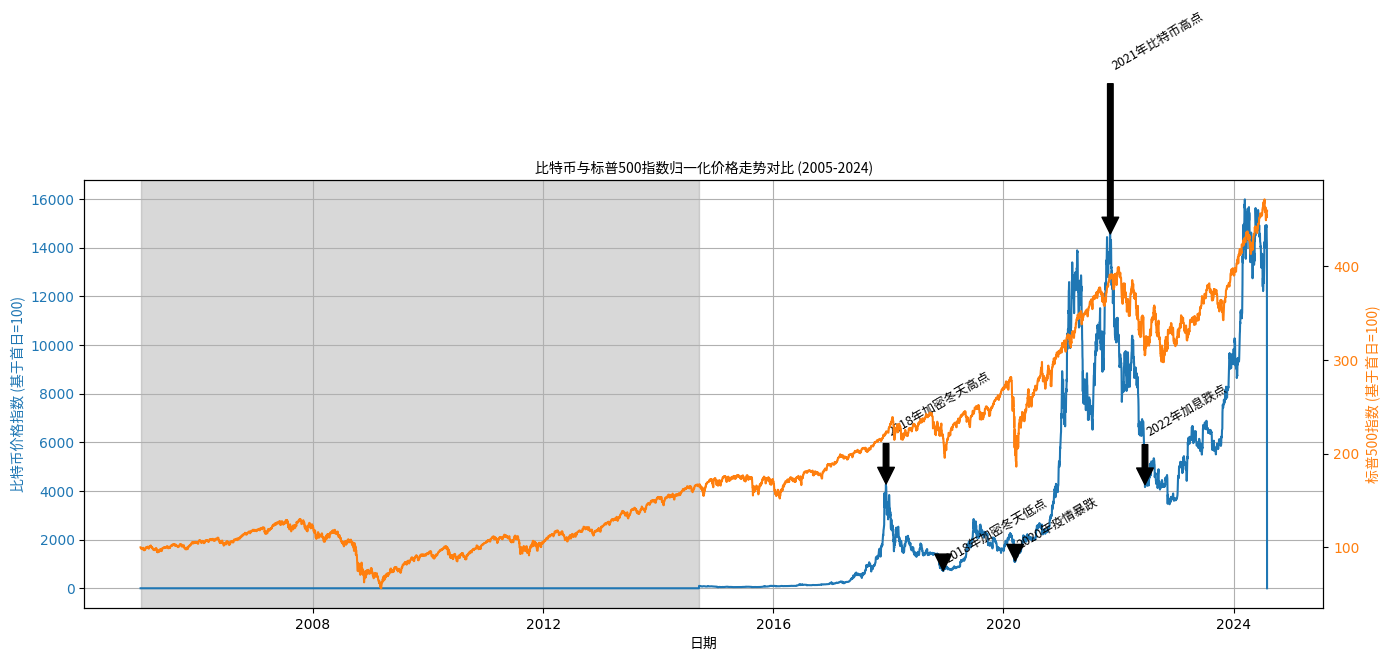

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import pandas as pd
import yfinance as yf

# 字体路径（Colab常用）
font_path = '/usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc'
font_prop = fm.FontProperties(fname=font_path)

start_date = "2005-01-01"
end_date = "2024-08-01"

# 下载数据
btc = yf.download("BTC-USD", start=start_date, end=end_date, auto_adjust=True)
sp500 = yf.download("^GSPC", start=start_date, end=end_date, auto_adjust=True)

# 确保Close是Series
btc_close = btc['Close']
if isinstance(btc_close, pd.DataFrame):
    btc_close = btc_close.iloc[:, 0]

sp500_close = sp500['Close']
if isinstance(sp500_close, pd.DataFrame):
    sp500_close = sp500_close.iloc[:, 0]

# 生成完整日期索引
all_dates = pd.date_range(start=start_date, end=end_date, freq='D')

# BTC填充与归一化
btc_filled = btc_close.reindex(all_dates).fillna(0)
btc_norm = pd.Series(index=all_dates, dtype='float64')

first_valid_btc = btc_close[btc_close > 0].index[0]
start_pos = btc_norm.index.get_loc(first_valid_btc)

btc_norm.iloc[start_pos:] = (btc_filled.loc[first_valid_btc:] / btc_filled.loc[first_valid_btc]) * 100
btc_norm.iloc[:start_pos] = 0

# 标普500填充与归一化
sp500_filled = sp500_close.reindex(all_dates).ffill()
sp500_norm = pd.Series(index=all_dates, dtype='float64')
first_valid_sp500 = sp500_close.first_valid_index()
start_pos_sp = sp500_norm.index.get_loc(first_valid_sp500)

sp500_norm.iloc[start_pos_sp:] = (sp500_filled.loc[first_valid_sp500:] / sp500_filled.loc[first_valid_sp500]) * 100
sp500_norm.iloc[:start_pos_sp] = sp500_norm.iloc[start_pos_sp]

# 画图
fig, ax1 = plt.subplots(figsize=(14,7))

color_btc = 'tab:blue'
ax1.set_xlabel('日期', fontproperties=font_prop)
ax1.set_ylabel('比特币价格指数 (基于首日=100)', color=color_btc, fontproperties=font_prop)
ax1.plot(btc_norm.index, btc_norm, color=color_btc, label='比特币价格指数')
ax1.tick_params(axis='y', labelcolor=color_btc)
ax1.grid(True)

# 添加比特币未诞生期灰色背景
ax1.axvspan(pd.to_datetime(start_date), first_valid_btc - pd.Timedelta(days=1), color='gray', alpha=0.3)

color_sp500 = 'tab:orange'
ax2 = ax1.twinx()
ax2.set_ylabel('标普500指数 (基于首日=100)', color=color_sp500, fontproperties=font_prop)
ax2.plot(sp500_norm.index, sp500_norm, color=color_sp500, label='标普500指数')
ax2.tick_params(axis='y', labelcolor=color_sp500)

events = {
    '2018年加密冬天高点': '2017-12-17',
    '2018年加密冬天低点': '2018-12-15',
    '2020年疫情暴跌': '2020-03-16',
    '2021年比特币高点': '2021-11-10',
    '2022年加息跌点': '2022-06-18'
}

for label, date_str in events.items():
    date = pd.to_datetime(date_str)
    if date in btc_norm.index:
        ax1.annotate(label,
                     xy=(date, btc_norm.loc[date]),
                     xytext=(date, btc_norm.loc[date] * 1.5),
                     arrowprops=dict(facecolor='black', shrink=0.05),
                     fontsize=9,
                     rotation=30,
                     fontproperties=font_prop)

plt.title('比特币与标普500指数归一化价格走势对比 (2005-2024)', fontproperties=font_prop)
fig.tight_layout()
plt.show()